In [1]:
import tensorflow as tf

## Loading MNIST Dataset
### Containing Training Samples = 60,000, Testing Samples = 10,000

In [2]:
mnist = tf.keras.datasets.mnist # Contains 28x28 sized images of handwritten digits from 0 to 9

### Dividing into Training and Testing Datasets

In [3]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

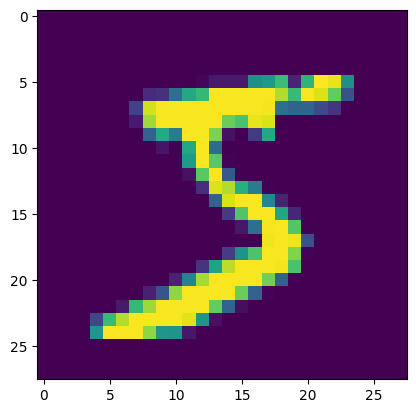

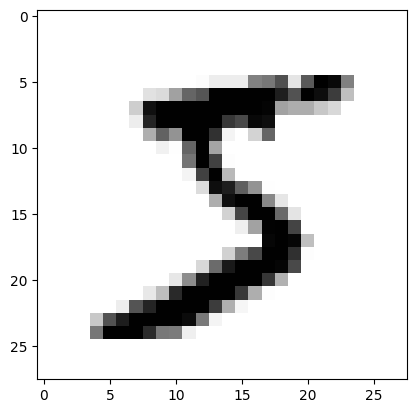

In [6]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()
plt.imshow(x_train[0], cmap= plt.cm.binary)

### Checking the value of each pixel
#### Before Normalization

In [7]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

#### As images are in Gray Level (1 Channel ==> 0 to 255), not Colored(RGB)
#### Normalizing the Data | Pre-processing Step

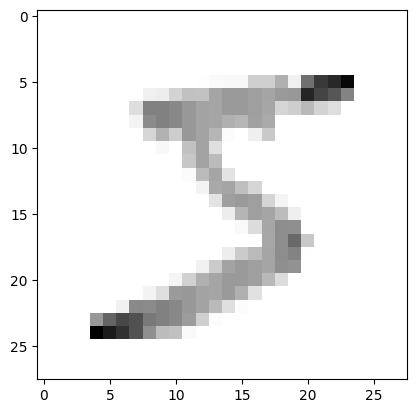

In [8]:
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)
plt.imshow(x_train[0], cmap = plt.cm.binary)

#### After Normalization

In [9]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [10]:
print(y_train[0])

5


#### Resizing Image to make it suitable for applying Convolution Operation

In [11]:
import numpy as np
IMG_SIZE = 28
x_trainr = np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1) #Increaasing one dimension for kernel / filter operation
x_testr = np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1) #Increaasing one dimension for kernel / filter operation
print("Training Samples Dimension", x_trainr.shape)
print("Testing Samples Dimension", x_testr.shape)

Training Samples Dimension (60000, 28, 28, 1)
Testing Samples Dimension (10000, 28, 28, 1)


### Creating a Deep Neural Network
#### Training on 60,000 samples of MNIST Handwritten Dataset

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [13]:
model = Sequential()
### First Convolution Layer 0 1 2 3 (60000, 28, 28, 1)  28-3+1= 26x26
model.add(Conv2D(64, (3,3), input_shape = x_trainr.shape[1:])) # Mention Input Layer Size only for first convolution layer
model.add(Activation("relu")) # Activation Function to make it non-linear, <0 will be removed and >0 will be allowed
model.add(MaxPooling2D(pool_size=(2,2))) # Maxpooling (Single Maximum value of 2x2),

## 2nd Convolution Layer 
model.add(Conv2D(64, (3,3), input_shape = x_trainr.shape[1:])) # 2nd Convolution layer
model.add(Activation("relu")) # Activation Function
model.add(MaxPooling2D(pool_size=(2,2))) # Maxpooling

## 3rd Convolution Layer 
model.add(Conv2D(64, (3,3), input_shape = x_trainr.shape[1:])) # 3rd Convolution layer
model.add(Activation("relu")) # Activation Function
model.add(MaxPooling2D(pool_size=(2,2))) # Maxpooling

## Fully Connected Layer - 1
model.add (Flatten()) ## Before using fully connected layer, need to flatten (Converts 2D to 1D)
model.add (Dense(64)) 
model.add (Activation("relu"))

## Fully Connected Layer - 2
model.add (Dense(32)) 
model.add (Activation("relu"))

## Last Fully Connected Layer , Output must be equal to number of classes, 10(0-9)
model.add (Dense(10))
model.add (Activation("softmax")) ##Activation function is changed to softmax (Class Probabilities)

##For binary classification, there will be one neuron in dense layer and activation function must be sigmoid


C:\Users\CONNECT\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             330 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 81,066 (316.66 KB)

 Trainable params: 81,066 (316.66 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
print("Total Training Samples = ", len(x_trainr))

Total Training Samples =  60000


In [16]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

In [17]:
model.fit(x_trainr, y_train, epochs=10, validation_split= 0.3) ##Training the model

Epoch 1/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 52s 36ms/step - accuracy: 0.7849 - loss: 0.6547 - val_accuracy: 0.9573 - val_loss: 0.1391
Epoch 2/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 44s 33ms/step - accuracy: 0.9660 - loss: 0.1079 - val_accuracy: 0.9726 - val_loss: 0.0906
Epoch 3/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 43s 33ms/step - accuracy: 0.9770 - loss: 0.0733 - val_accuracy: 0.9781 - val_loss: 0.0676
Epoch 4/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 44s 33ms/step - accuracy: 0.9838 - loss: 0.0532 - val_accuracy: 0.9765 - val_loss: 0.0806
Epoch 5/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 43s 33ms/step - accuracy: 0.9858 - loss: 0.0446 - val_accuracy: 0.9787 - val_loss: 0.0689
Epoch 6/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 45s 34ms/step - accuracy: 0.9889 - loss: 0.0363 - val_accuracy: 0.9812 - val_loss: 0.0624
Epoch 7/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 80s 32ms/step - accuracy: 0.9913 - loss: 0.0265 - val_accuracy: 0.9826 - val_loss: 0.0633
Epoch 8/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 43s 33ms/step - accuracy: 0.9934 -

In [18]:
## Evaluating on testing data MNIST
test_loss, test_acc = model.evaluate(x_testr, y_test)
print("Test Loss on 10,000 test samples", test_loss)
print("Validation Accuracy on 10,000 test samples", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9760 - loss: 0.0991
Test Loss on 10,000 test samples 0.0773792639374733
Validation Accuracy on 10,000 test samples 0.9818000197410583


In [19]:
model.save("handwritten_digit_recognition.keras")

In [20]:
predictions = model.predict([x_testr])

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step


In [21]:
print(predictions)

[[2.2180939e-11 1.1165717e-09 3.5480925e-09 ... 1.0000000e+00
  4.9872950e-11 2.5891828e-10]
 [3.9162146e-08 7.7725241e-14 1.0000000e+00 ... 4.3856546e-10
  2.0293932e-08 6.5886630e-13]
 [2.5206031e-09 9.9999928e-01 2.6939415e-07 ... 3.7178276e-07
  1.5466798e-08 1.2900470e-10]
 ...
 [1.9590201e-13 1.7816827e-08 2.9786505e-12 ... 4.3882487e-10
  4.9492744e-08 3.2824032e-11]
 [6.3902974e-08 1.6676622e-06 1.6508674e-09 ... 1.7741112e-09
  4.5085861e-04 6.6911934e-07]
 [9.5360647e-06 4.8298290e-07 7.8180989e-07 ... 1.5912505e-10
  2.5166844e-05 2.5784070e-08]]


In [22]:
# In order to understand, convert the predictions from One hot encoding, we need to use numpy for that
print(np.argmax(predictions[0])) # this will return the maximum value index and find the value of it

7


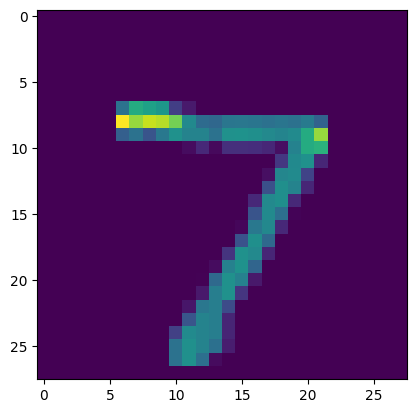

In [23]:
plt.imshow(x_test[0])

In [24]:
print(np.argmax(predictions[128]))

8


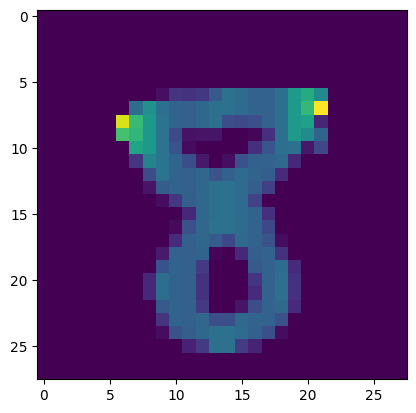

In [25]:
plt.imshow(x_test[128])

In [26]:
import cv2

In [27]:
img = cv2.imread('eight.png')

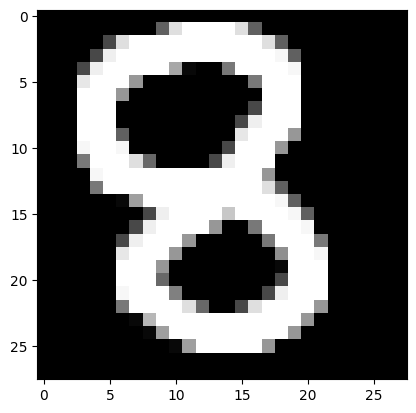

In [28]:
plt.imshow(img)

In [29]:
img.shape

(28, 28, 3)

In [30]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [31]:
gray.shape

(28, 28)

In [32]:
resized = cv2.resize(gray, (28,28), interpolation = cv2.INTER_AREA)

In [33]:
resized.shape

(28, 28)

In [34]:
newing = tf.keras.utils.normalize(resized, axis=1) # 0 to 1 Scaling

In [35]:
newing = np.array(newing).reshape(-1, IMG_SIZE, IMG_SIZE, 1) # kernel operation of convolution layer,

In [36]:
newing.shape

(1, 28, 28, 1)

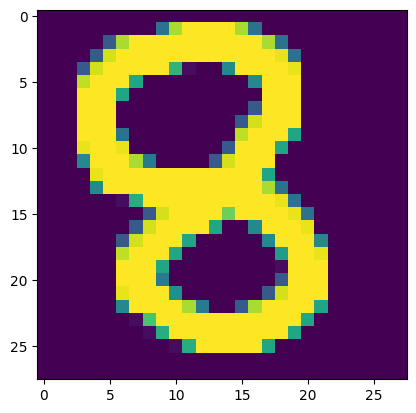

In [37]:
plt.imshow(resized)

In [38]:
predictions = model.predict(newing)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


In [39]:
print(np.argmax(predictions))

8


In [48]:
import pygame
import cv2

# Initialize pygame
pygame.init()

# Set the canvas size to 28x28 pixels
canvas_size = 500
screen = pygame.display.set_mode((canvas_size, canvas_size))

# Set the title of the window
pygame.display.set_caption("Drawing Canvas")

# Set the background color to black
screen.fill((0, 0, 0))

# Set drawing color to white
draw_color = (255, 255, 255)
brush_size = 10

# Function to save the drawing as an image
def save_drawing(surface, filename):
    pygame.image.save(surface, filename)

# Main loop
running = True
while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False

        # Drawing with mouse
        if pygame.mouse.get_pressed()[0]:
            mouse_pos = pygame.mouse.get_pos()
            pygame.draw.circle(screen, draw_color, mouse_pos, brush_size)

        # Save the image when the user presses the 'S' key
        if event.type == pygame.KEYDOWN:
            if event.key == pygame.K_s:
                save_drawing(screen, "drawing.png")
                print("Drawing saved as drawing.png")
    
    # Update the display
    pygame.display.flip()

# Quit pygame
pygame.quit()

# # Convert the saved image to grayscale for feeding to a model
# image = cv2.imread("drawing.png", cv2.IMREAD_GRAYSCALE)

# # Resize the image if needed (usually not needed since it's already 28x28)
# # image = cv2.resize(image, (28, 28))

# # Normalize the image (optional depending on your model's requirements)
# image = image / 255.0

# # Now `image` is ready to be fed into a model
# print("Image ready for model input.")


Drawing saved as drawing.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
3


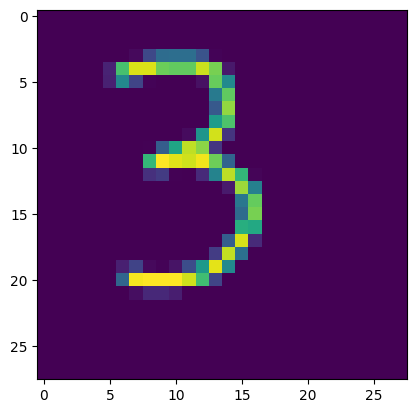

In [49]:
# Execution
img1 = cv2.imread('drawing.png')
plt.imshow(img1)
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
resized1 = cv2.resize(gray1, (28,28), interpolation = cv2.INTER_AREA)
newing1 = tf.keras.utils.normalize(resized1, axis=1) # 0 to 1 Scaling
newing1 = np.array(newing1).reshape(-1, IMG_SIZE, IMG_SIZE, 1) # kernel operation of convolution layer,
plt.imshow(resized1)
predictions1 = model.predict(newing1)
print(np.argmax(predictions1))